# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had the more reliable effect compared with the other treatments, with less stdd of the tumor volume (4.84-4.99 vs. 6.27-8.30).

- For a sepcific observation (l509), Capomulin showed a possitive curative effect, the tumor volume fell down overally. However, the tumor volume had an increasing tendency at the final timepoint, a long term experient is potentially to be required. Also, it's neccesary to look at more observations to obtain a consistency result.

- Under Capomulin treatment, weight and average tumor volume had a possitive correlation coefficient (Corr=0.84, R_square=0.71). The average tumor volume will increase by 0.95(mm3) + 21.55(mm3) with the weight increasing by 1(g).
 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on=["Mouse ID"],how = "outer")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].nunique()
print(f'the number of mice is: {number_of_mice}')

the number of mice is: 249


In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_id_count =merged_df["Mouse ID"].value_counts()
print(f"The duplticate mice is: {mouse_id_count[mouse_id_count > 10]}")

The duplticate mice is: g989    13
Name: Mouse ID, dtype: int64


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df.loc[merged_df['Mouse ID'] == 'g989',]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df['Mouse ID'] != 'g989',]
clean_df = clean_df.reindex(columns=['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [86]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df['Mouse ID'].nunique()
print(f'the number of mice is: {number_of_mice}')

the number of mice is: 248


## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_list = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_list = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_list = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_list = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_list = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(lambda x: np.std(x, ddof=1) / np.sqrt(np.size(x)))

summary_stats1 = pd.DataFrame({'Mean Tumor Volume':mean_list,
                              'Median Tumor Volume':median_list,
                              'Tumor Volume Variance':var_list,
                              'Tumor Volume Std. Dev.':std_list,
                              'Tumor Volume Std. Err.':sem_list})
summary_stats1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

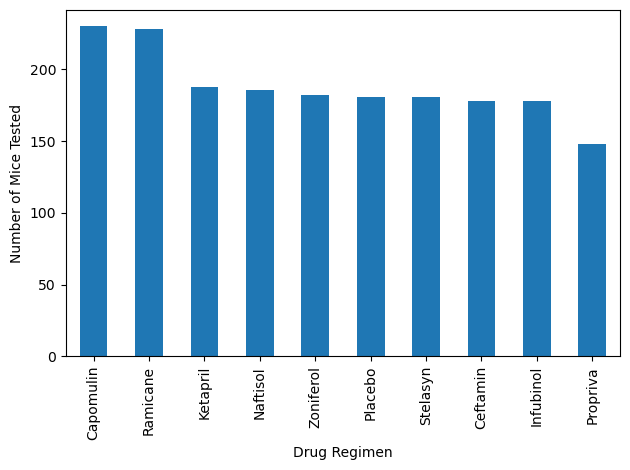

In [89]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grp_regimen = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending = False)
timepoint_chart = grp_regimen.plot.bar()
timepoint_chart.set_xlabel("Drug Regimen")
timepoint_chart.set_ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show();

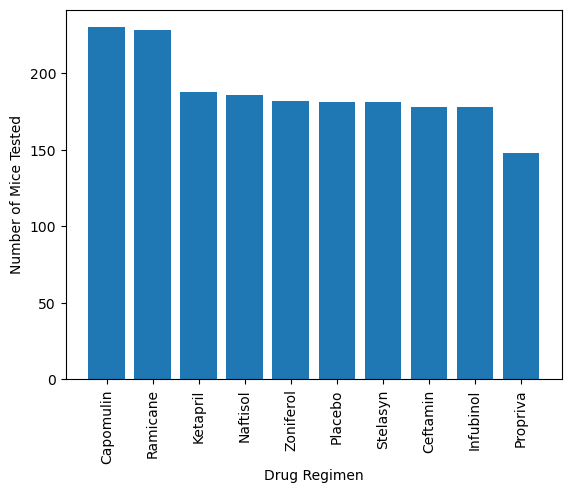

In [90]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

grp_regimen = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending = False)
x_axis = np.arange(len(grp_regimen))
plt.bar(x_axis,grp_regimen)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, grp_regimen.index, rotation="vertical")
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.show();

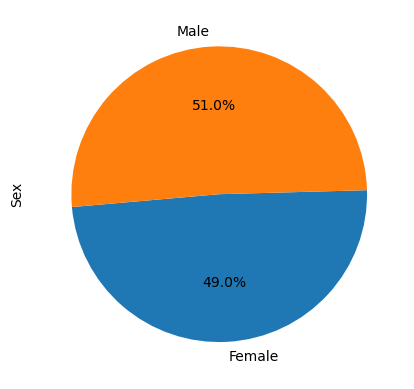

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

grp_sex = clean_df.groupby('Sex').size().reset_index(name='counts')
ax = grp_sex.plot.pie(y='counts',labels=grp_sex ['Sex'],legend = False, autopct='%1.1f%%',startangle = 185)
ax.set_ylabel('Sex')
plt.show();

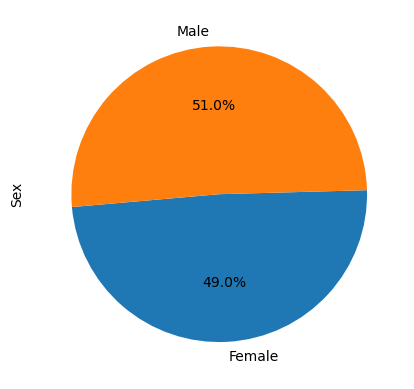

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grp_sex =  clean_df.groupby('Sex').size().reset_index(name='counts')
pies = grp_sex['Sex']
pie_numbers = grp_sex['counts']
plt.pie(pie_numbers, labels=pies, autopct="%1.1f%%",startangle=185)
plt.ylabel("Sex")
plt.show();

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
merged_by_time = pd.merge(last_timepoint,clean_df,on=['Mouse ID','Timepoint'])

four_drugs = merged_by_time.loc[(merged_by_time['Drug Regimen']=='Capomulin')| (merged_by_time['Drug Regimen']=='Ramicane')|(merged_by_time['Drug Regimen']=='Infubinol')|(merged_by_time['Drug Regimen']=='Ceftamin'),]
final_tumor_vol = four_drugs.groupby(['Drug Regimen','Mouse ID']).sum()

final_tumor_vol_renamed = final_tumor_vol.rename(columns={'Timepoint': 'Greatest Timepoint', 'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'}).reset_index()
final_tumor_vol_renamed

,Drug Regimen,Mouse ID,Greatest Timepoint,Final Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,9,22
1,Capomulin,b742,45,38.939633,0,7,21
2,Capomulin,f966,20,30.485985,0,16,17
3,Capomulin,g288,45,37.074024,1,3,19
4,Capomulin,g316,45,40.159220,2,22,22
...,...,...,...,...,...,...,...
95,Ramicane,s508,45,30.276232,0,1,17
96,Ramicane,u196,45,40.667713,3,18,25
97,Ramicane,w678,5,43.166373,0,5,24
98,Ramicane,y449,15,44.183451,0,19,24


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)       
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_tumor_vol=[]

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = final_tumor_vol_renamed.loc[final_tumor_vol_renamed['Drug Regimen'] == treatment]['Final Tumor Volume (mm3)']
    
    # Calculate the IQR
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # add subset 
    drug_tumor_vol.append(data)
    
    # Determine outliers using upper and lower bounds    
    outliers=([i for i in data if (i < lower_bound) | (i > upper_bound)])
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


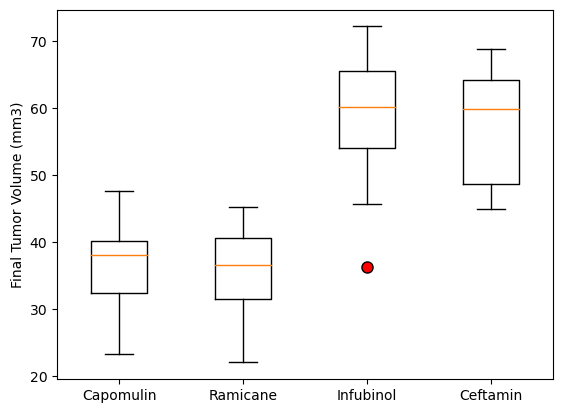

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(drug_tumor_vol,labels= treatments, flierprops=dict(marker='o', markerfacecolor='red',markersize=8))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show();

## Line and Scatter Plots

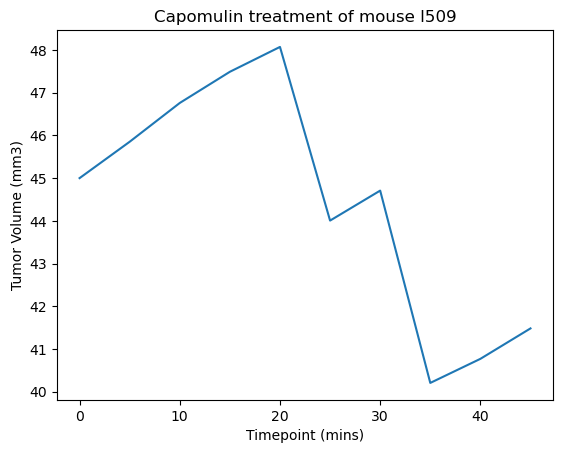

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509= clean_df.loc[clean_df['Mouse ID']=="l509",["Timepoint","Tumor Volume (mm3)"]].reset_index(drop=True)
plt.plot(l509['Timepoint'],l509['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (mins)")
plt.show();

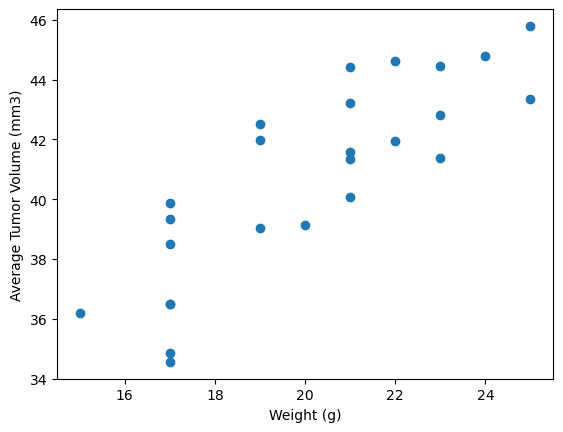

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_avg_volume = clean_df.groupby(['Drug Regimen','Mouse ID']).mean().reset_index()
ca_weight_avg_volume = weight_avg_volume.loc[weight_avg_volume['Drug Regimen']=="Capomulin"]
x_value = ca_weight_avg_volume['Weight (g)']
y_value = ca_weight_avg_volume['Tumor Volume (mm3)']
plt.scatter(x_value, y_value)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show();

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r_square of the regression is : 0.7088568047708723


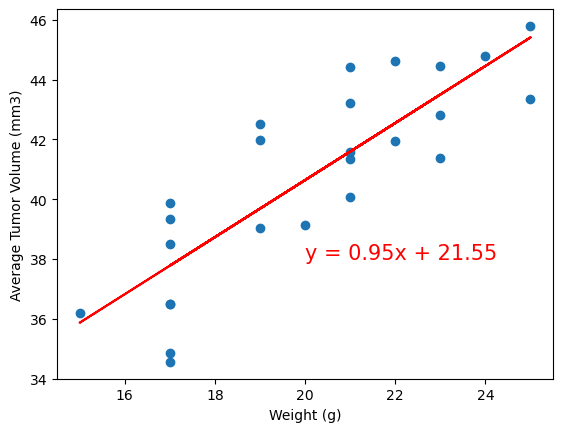

In [98]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_value, y_value)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, color = "blue",alpha=0.01)
plt.plot(x_value,regress_values,color ="red")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_value,y_value)[0],2)}')
print(f'The r_square of the regression is : {rvalue**2}')
plt.show();